# La droite des mondres carrées

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Ici on définit toutes les fonctions dont on besoin
def f(x):
    return 2*x+2
f=np.vectorize(f)

def moyenne(x):
    # Calcule la moyenne d'un vecteur
    n = len(x)
    z = sum(x)/n
    return z

def cov(x,y):  
    # Calcule la covariance de deux vecteurs
    n = len(x)
    z = np.dot(x,y)/n-moyenne(x)*moyenne(y)
    return z

def var(x):
    # Calcule la variance d'un vecteur
    return cov(x,x)

def WeightCoef(xi,yi):
    xbar = moyenne(xi)
    ybar = moyenne(yi)
    w1 = cov(xi,yi)/var(xi) 
    w0 = ybar-w1*xbar
    w =[w0,w1]
    return w

def f_prediction(x,w): # def de La droite des moindres carrées  
    return w[1]*x+w[0]

Pour x=1.75 Erreur est de =0.67 %


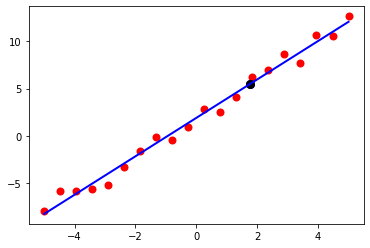

In [3]:
alpha0= 1.5
xmin = -5.
xmax = 5.

n = 20
pas=(xmax-xmin)/(n-1)
xi=[xmin+i*pas for i in range(n)]
yi=[f(t)+2*random.random()*alpha0-alpha0 for t in xi]
plt.scatter(xi,yi,color='r',linewidth=2)


w = WeightCoef(xi,yi)


hx=(xmax-xmin)/200
x = np.linspace(xmin,xmax,2)
y = f_prediction(x,w)  # l'équation de la droite des mondres carrées

plt.plot(x,y,color='b',linewidth=2)


x = 1.75
yp = f_prediction(x,w)
yf =f(x)
erreur =np.abs(yp-yf)/np.abs(yf)*100;
print('Pour x=%1.2f'%x,'Erreur est de =%2.2f'%erreur,'%')
plt.scatter(x,yf,color='b',linewidth=3)
plt.scatter(x,yp,color='k',linewidth=3)

plt.show()